In [1]:
using Distributions;
using Random;
using Statistics;
p_ref = 0.9
ref_depth = 100
d = NegativeBinomial(ref_depth, p_ref) 

NegativeBinomial{Float64}(r=100.0, p=0.9)

In [3]:
println(params(d));
println(succprob(d));
println(failprob(d));
println("Probability of find 10 mutant reads before 10000 ref ones is ", pdf(d, 10))
println("Mean of this NB is ", params(d)[1]*(1-succprob(d))/succprob(d), ". Or by calling mean() ", mean(d))
println("Variance of the NB is ", params(d)[1]*(1-succprob(d))/succprob(d)^2, ". Or by calling var() ", var(d));
println("Median of this NB is ", median(d));
println("Probability of find at most 10 mutant reads before 10000 ref ones is ", cdf(d,10));
println("Probability of find 10 or more mutant reads before 10000 ref ones is ", 1-cdf(d,9));

(100.0, 0.9)
0.9
0.09999999999999998
Probability of find 10 mutant reads before 10000 ref ones is 0.11324243938678916
Mean of this NB is 11.111111111111109. Or by calling mean() 11.111111111111109
Variance of the NB is 12.345679012345675. Or by calling var() 12.345679012345675
Median of this NB is 11
Probability of find at most 10 mutant reads before 10000 ref ones is 0.45355228876956877
Probability of find 10 or more mutant reads before 10000 ref ones is 0.6596901506172212


In [4]:
d_pois = Poisson((ref_depth/p_ref)*(1-p_ref))
count_v = 1:1:20;
count_p_pois = pdf.(d_pois,count_v)
count_p_nb = pdf.(d,count_v)

20-element Vector{Float64}:
 0.00026561398887587555
 0.0013413506438231689
 0.004560592188998782
 0.011743524886671892
 0.02442653176427748
 0.04274643058748582
 0.06473030917533529
 0.08657678852201102
 0.10389214622641361
 0.11324243938678916
 0.11324243938679077
 0.10474925643278145
 0.09024551323439615
 0.0728410213963337
 0.05535917626121378
 0.039789407937747885
 0.02715041953399259
 0.01764777269709506
 0.010960195675038163
 0.006521316426647618

In [5]:
# Pkg.add("Plots")
using Plots, Random;

  0.000042 seconds (5 allocations: 560 bytes)
  0.001342 seconds (445 allocations: 44.086 KiB)
  0.000425 seconds (245 allocations: 20.688 KiB)


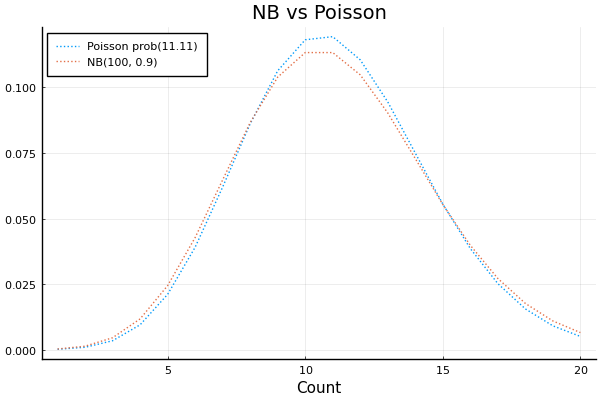

In [7]:
@time pyplot()  # set the backend to PyPlot
@time Plots.plot(count_v, count_p_pois, ls=:dot, title="NB vs Poisson", xlab="Count", label="Poisson prob(11.11)", legend=:topleft)
@time Plots.plot!(count_v, count_p_nb, ls=:dot, label="NB(100, 0.9)")
#plot!(xscale=:log10, yscale=:log10, minorgrid=true)
#Plots.plot!(xscale=:log10, yscale=:identity, minorgrid=true)